# Task 0
- Single output neuron, standard synapse model, Oja rule.

In [24]:
import numpy as np 
import matplotlib.pyplot as plt
import numpy.random as random

from itertools import product
from collections import namedtuple

In [25]:
def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

In [26]:
N = 10 # number of presynaptic neurons
w = random.randn(N) # weight vector
e1 = random.randn(N, 1) # first principal component of covariance
e2 = random.randn(N, 1) 
e2 = e2 - (e2.T.dot(e1).item()/e1.T.dot(e1).item())*e1 # second principal component of covariance
a = 0.1
Q = e1.dot(e1.T) + a * np.identity(N) # covariance matrix
mu = np.zeros(N) # mean
tau_w = 300 # time constant for weight updates
T = 10000 # number of simulation time steps
alpha = 1

parameters = dict(
    tau_w=[3, 30, 300, 3000],
    a=[0.1, 1, 10]
)

Run = namedtuple('Run', parameters.keys())


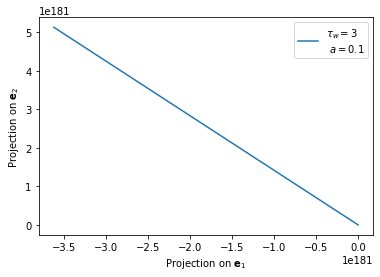

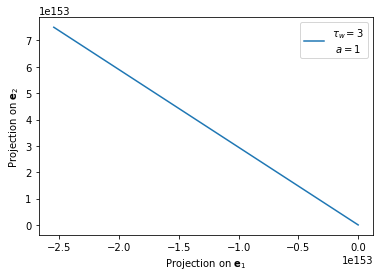

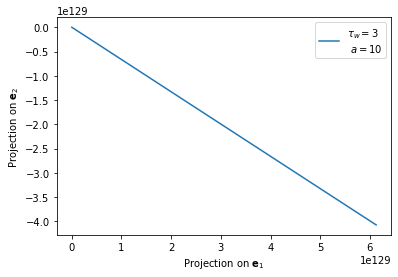

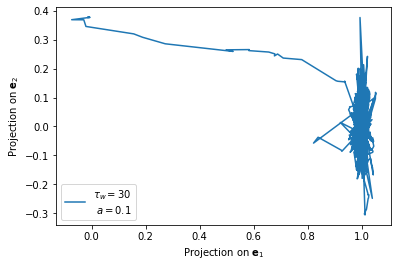

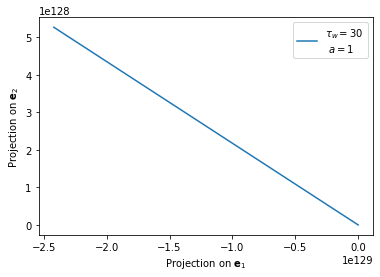

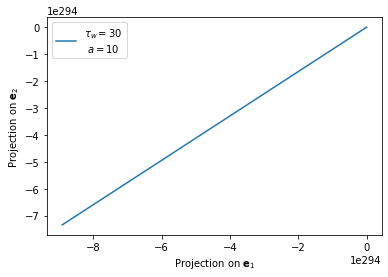

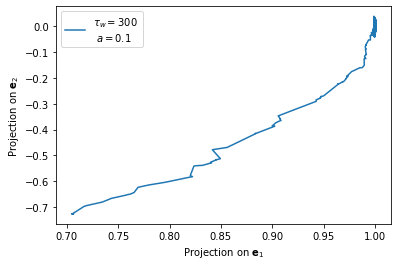

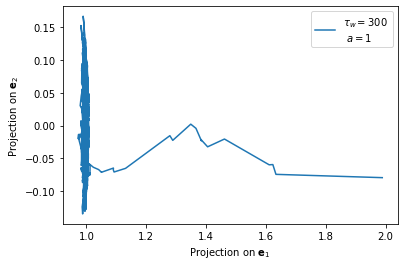

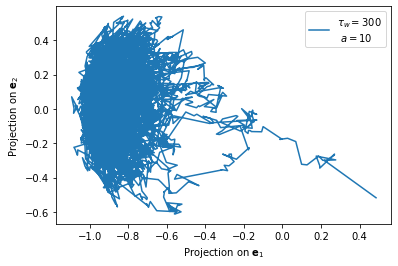

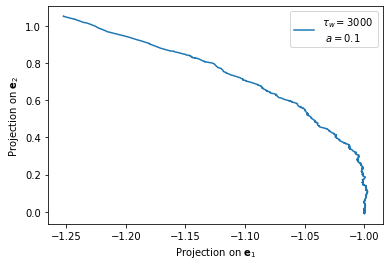

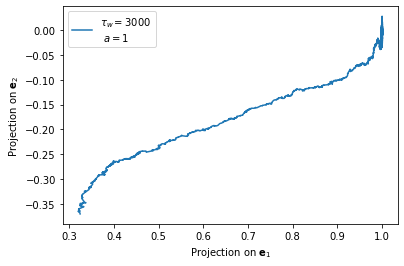

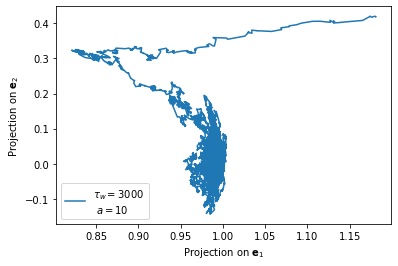

In [27]:
for v in product(*parameters.values()):
    run = (Run(*v))
    tau_w = run.tau_w
    a = run.a

    U = []
    W = []
    W_norm = []

    w = random.randn(N) # weight vector
    Q = e1.dot(e1.T) + a * np.identity(N) # covariance matrix

    for t in range(T):
        u = random.multivariate_normal(mu, Q)
        v = u.dot(w)
        w = w + (1/tau_w) * (v*u - alpha*(v**2)*w)
        U.append(u)
        W.append(w)
        W_norm.append(np.sqrt(w.T.dot(w)))

    U = np.array(U)
    W = np.array(W)
    W_norm = np.array(W_norm)

    W1 = W.dot(e1)/np.sqrt(e1.T.dot(e1))
    W2 = W.dot(e2)/np.sqrt(e2.T.dot(e2))
    plt.figure()
    plt.plot(W1, W2)
    plt.xlabel('Projection on $\mathbf{e}_1$')
    plt.ylabel('Projection on $\mathbf{e}_2$')
    plt.legend(['$\\tau_w=${} \n $a=${}'.format(tau_w, a)])